In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

import functions



In [108]:
# calculate the % of the dfs and dfspot for each scenario 

def prepare_dfcount_for_plot(dfcount):
    melted = pd.melt(dfcount, id_vars=['D', 'D_year', 'D_month'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 

def prepare_dfcount_for_plot_annual(dfcount):
    melted = pd.melt(dfcount, id_vars=['D'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation200, axis=1)
    # melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 

def cut_dates(df):
    df['D'] = pd.to_datetime(df['D'])
    filtered_df = df[df['D'] > '1990-07-31']
    return filtered_df


# Define a function to extract the lower bound for sorting purposes
def custom_sort_elevation(elevation):
    if '<' in elevation:
        return 0  # Set a very low value for "< 2000"
    elif '>' in elevation:
        return 6000  # Set a very high value for "> 6000"
    else:
        # Split the range and convert the first part (lower bound) to an integer
        return int(elevation.split('-')[0].strip())


# langtang

In [109]:
freq = 'annual'
column = 'Qdftl'
location = 'langtang'

flood_folder =  f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/dfspot_count/{location}/'


dfspot1 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover1.csv', index_col = 0).fillna(0)[1:]#[:-1]
dfspot2 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover2.csv', index_col = 0).fillna(0)[1:]#[:-1]
dfspot3 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover3.csv', index_col = 0).fillna(0)#[1:]#[:0]
dfspot4 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover4.csv', index_col = 0).fillna(0)[1:]#[:-1]

# dfspot1 = cut_dates(dfspot1)
# dfspot2 = cut_dates(dfspot2)
# dfspot3 = cut_dates(dfspot3)
# dfspot4 = cut_dates(dfspot4)

# dfspot1 = dfspot1[:372]
# dfspot2 = dfspot2[:372]
# dfspot3 = dfspot3[:372]
# dfspot4 = dfspot4[:372]

In [110]:
# dfspot4

In [111]:
dfspot1_melted = prepare_dfcount_for_plot_annual(dfspot1)
dfspot2_melted = prepare_dfcount_for_plot_annual(dfspot2)
dfspot3_melted = prepare_dfcount_for_plot_annual(dfspot3)
dfspot4_melted = prepare_dfcount_for_plot_annual(dfspot4)

dfspot1_melted = dfspot1_melted.rename(columns={'dfs_count': 'dfspot_count'})
dfspot2_melted = dfspot2_melted.rename(columns={'dfs_count': 'dfspot_count'})
dfspot3_melted = dfspot3_melted.rename(columns={'dfs_count': 'dfspot_count'})
dfspot4_melted = dfspot4_melted.rename(columns={'dfs_count': 'dfspot_count'})


In [112]:
# 1716
33*53 - 33

1716

In [113]:
daily20_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
daily20_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
daily20_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover3.csv', index_col = 0).fillna(0)[:-1]#[:372]
daily20_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_20percent/{location}_{freq}_df_count_20percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

daily30_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
daily30_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
daily30_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
daily30_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_30percent/{location}_{freq}_df_count_30percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

daily40_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
daily40_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
daily40_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
daily40_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_daily/output_40percent/{location}_{freq}_df_count_40percent_landcover4.csv', index_col = 0).fillna(0)#[:372]


# prepare for plots ets 
# 20 percent
daily20_lc1_melt = prepare_dfcount_for_plot_annual(daily20_lc1)
daily20_lc2_melt = prepare_dfcount_for_plot_annual(daily20_lc2)
daily20_lc3_melt = prepare_dfcount_for_plot_annual(daily20_lc3)
daily20_lc4_melt = prepare_dfcount_for_plot_annual(daily20_lc4)

daily20_lc1_melt['dfspot_count'] = dfspot1_melted.dfspot_count.values
daily20_lc2_melt['dfspot_count'] = dfspot2_melted.dfspot_count.values
daily20_lc3_melt['dfspot_count'] = dfspot3_melted.dfspot_count.values
daily20_lc4_melt['dfspot_count'] = dfspot4_melted.dfspot_count.values

daily20_lc1_melt['floods'] = daily20_lc1_melt.dfspot_count - daily20_lc1_melt.dfs_count
daily20_lc2_melt['floods'] = daily20_lc2_melt.dfspot_count - daily20_lc2_melt.dfs_count
daily20_lc3_melt['floods'] = daily20_lc3_melt.dfspot_count - daily20_lc3_melt.dfs_count
daily20_lc4_melt['floods'] = daily20_lc4_melt.dfspot_count - daily20_lc4_melt.dfs_count


# 30 percent
daily30_lc1_melt = prepare_dfcount_for_plot_annual(daily30_lc1)
daily30_lc2_melt = prepare_dfcount_for_plot_annual(daily30_lc2)
daily30_lc3_melt = prepare_dfcount_for_plot_annual(daily30_lc3)
daily30_lc4_melt = prepare_dfcount_for_plot_annual(daily30_lc4)

daily30_lc1_melt['dfspot_count'] = dfspot1_melted.dfspot_count.values
daily30_lc2_melt['dfspot_count'] = dfspot2_melted.dfspot_count.values
daily30_lc3_melt['dfspot_count'] = dfspot3_melted.dfspot_count.values
daily30_lc4_melt['dfspot_count'] = dfspot4_melted.dfspot_count.values

daily30_lc1_melt['floods'] = daily30_lc1_melt.dfspot_count - daily30_lc1_melt.dfs_count
daily30_lc2_melt['floods'] = daily30_lc2_melt.dfspot_count - daily30_lc2_melt.dfs_count
daily30_lc3_melt['floods'] = daily30_lc3_melt.dfspot_count - daily30_lc3_melt.dfs_count
daily30_lc4_melt['floods'] = daily30_lc4_melt.dfspot_count - daily30_lc4_melt.dfs_count


# 40 percent
daily40_lc1_melt = prepare_dfcount_for_plot_annual(daily40_lc1)
daily40_lc2_melt = prepare_dfcount_for_plot_annual(daily40_lc2)
daily40_lc3_melt = prepare_dfcount_for_plot_annual(daily40_lc3)
daily40_lc4_melt = prepare_dfcount_for_plot_annual(daily40_lc4)

daily40_lc1_melt['dfspot_count'] = dfspot1_melted.dfspot_count.values
daily40_lc2_melt['dfspot_count'] = dfspot2_melted.dfspot_count.values
daily40_lc3_melt['dfspot_count'] = dfspot3_melted.dfspot_count.values
daily40_lc4_melt['dfspot_count'] = dfspot4_melted.dfspot_count.values


daily40_lc1_melt['floods'] = daily40_lc1_melt.dfspot_count - daily40_lc1_melt.dfs_count
daily40_lc2_melt['floods'] = daily40_lc2_melt.dfspot_count - daily40_lc2_melt.dfs_count
daily40_lc3_melt['floods'] = daily40_lc3_melt.dfspot_count - daily40_lc3_melt.dfs_count
daily40_lc4_melt['floods'] = daily40_lc4_melt.dfspot_count - daily40_lc4_melt.dfs_count


In [114]:
# daily40_lc1_melt

In [115]:
# test = daily40_lc1_melt.groupby('D_month').mean().reset_index()

In [116]:
# test

In [117]:
# fig = plt.figure(figsize=(20, 15))#, layout = 'tight')
# mosaic = fig.subplot_mosaic('''
#                             aaa
#                             bbb
#                             ccc
#                             ddd
#                             ''')


# # sns.boxplot(ax = mosaic['a'], x='elevation_bin', y='dfs_count', data=langtang1_melt)#, palette = 'magma_r') 
# # sns.boxplot(ax = mosaic['b'], x='elevation_bin', y='dfs_count', data=langtang2_melt)#, palette = 'magma_r') 
# # sns.boxplot(ax = mosaic['c'], x='elevation_bin', y='dfs_count', data=langtang3_melt)#, palette = 'magma_r') 
# # sns.boxplot(ax = mosaic['d'], x='elevation_bin', y='dfs_count', data=langtang4_melt)#, palette = 'magma_r') 

# sns.barplot(ax = mosaic['a'], x='D_month', y='dfs_count',    data=test, palette = 'Blues', label = 'dfs count')#, legend = True) 
# sns.barplot(ax = mosaic['a'], x='D_month', y='dfspot_count', data=test, palette = 'Greys', label = 'dfspot count')#, legend = True) 

# # sns.barplot(ax = mosaic['b'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=daily40_lc2_melt, palette = 'magma_r')#, legend = False)
# # sns.barplot(ax = mosaic['c'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=daily40_lc3_melt, palette = 'magma_r')#, legend = False)
# # sns.barplot(ax = mosaic['d'], x='D_month', y='dfs_count', hue = 'elevation_bin', data=daily40_lc4_melt, palette = 'magma_r')#, legend = False)

# # Adding text to the top-left corner of each subplot
# mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
# mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
# mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
# mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')


# # Hide x-ticks for all subplots except 'd'
# mosaic['a'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# mosaic['b'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# mosaic['c'].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# plt.setp(mosaic['d'].get_xticklabels(), rotation=45, ha="right")
# # sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
# # sns.move_legend(mosaic['a'], "upper left", bbox_to_anchor=(1, 1))
# # Remove legends from all but the first subplot
# # mosaic['b'].get_legend().remove()
# # mosaic['c'].get_legend().remove()
# # mosaic['d'].get_legend().remove()

# # fig.suptitle('Langtang; df count \n sediment input: daily, annual mean sediment yeild ', fontsize=30)

# plt.show()

In [118]:
daily40_lc1_melt

,D,elevation,dfs_count,elevation_bin,dfspot_count,floods
0,1990,4485.0,2.0,4400 - 4599,4.0,2.0
1,1991,4485.0,1.0,4400 - 4599,1.0,0.0
2,1992,4485.0,0.0,4400 - 4599,0.0,0.0
3,1993,4485.0,4.0,4400 - 4599,4.0,0.0
4,1994,4485.0,0.0,4400 - 4599,0.0,0.0
...,...,...,...,...,...,...
1659,2017,5936.0,0.0,5800 - 5999,0.0,0.0
1660,2018,5936.0,0.0,5800 - 5999,0.0,0.0
1661,2019,5936.0,0.0,5800 - 5999,0.0,0.0
1662,2020,5936.0,0.0,5800 - 5999,0.0,0.0


In [119]:
daily20_lc1_forplot = daily30_lc1_melt.groupby('D').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods']]
daily20_lc2_forplot = daily30_lc2_melt.groupby('D').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods']]
daily20_lc3_forplot = daily30_lc3_melt.groupby('D').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods']]
daily20_lc4_forplot = daily30_lc4_melt.groupby('D').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods']]




Text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%')

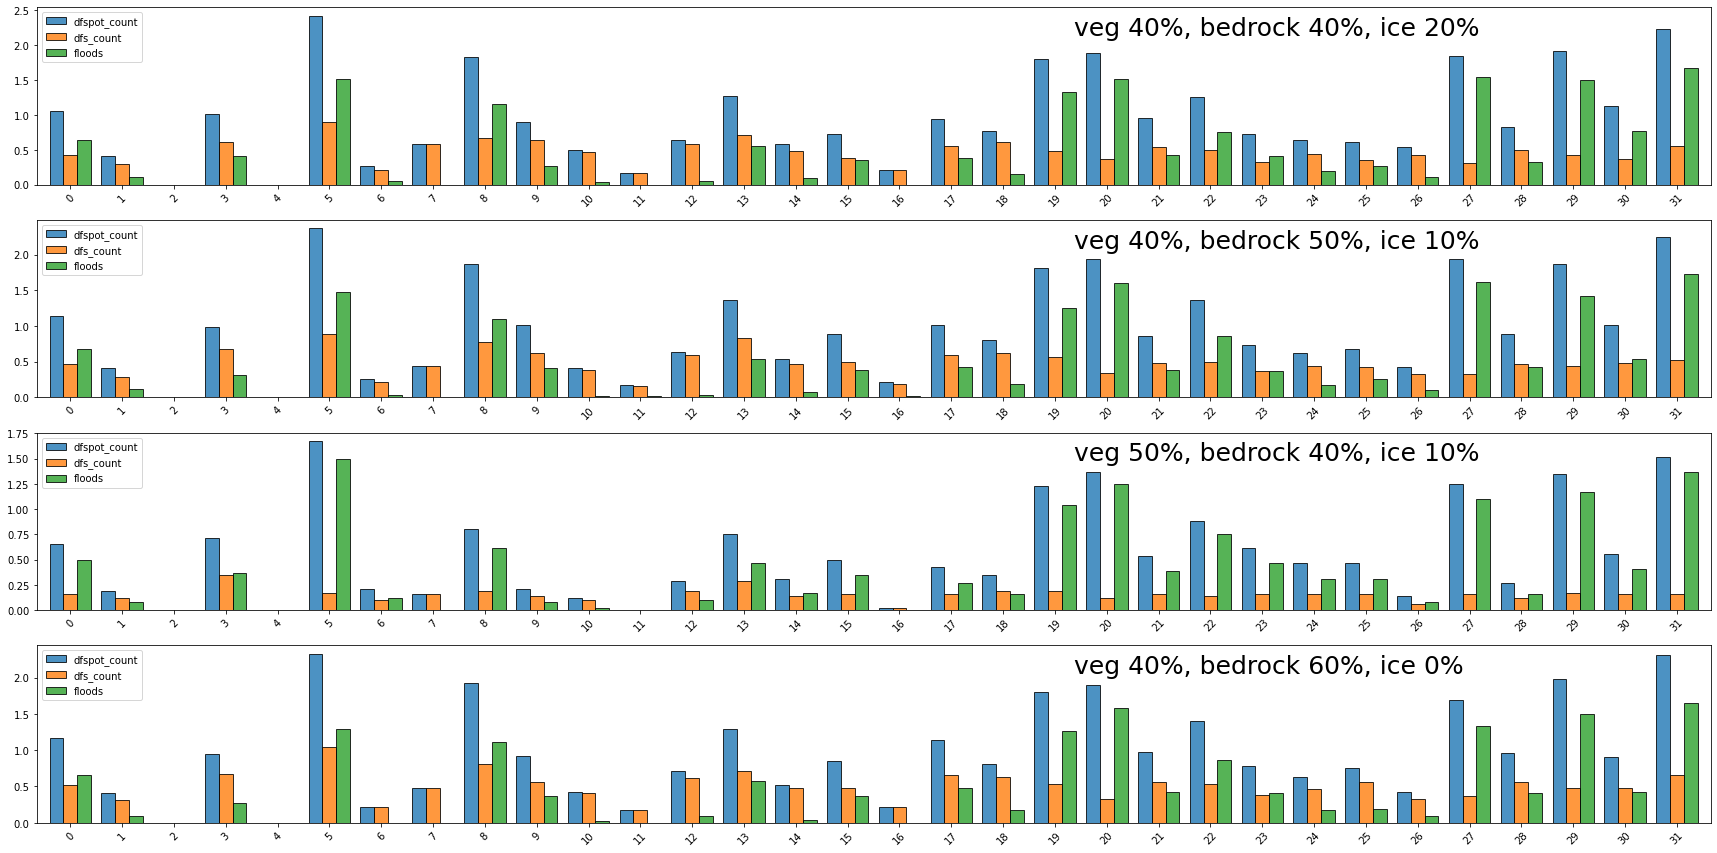

In [120]:
fig = plt.figure(figsize=(30, 15))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')

daily20_lc1_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=False, edgecolor = 'black', ax=mosaic['a'])
daily20_lc2_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=False, edgecolor = 'black', ax=mosaic['b'])
daily20_lc3_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=False, edgecolor = 'black', ax=mosaic['c'])
daily20_lc4_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=False, edgecolor = 'black', ax=mosaic['d'])


# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')


In [121]:
daily20_lc1_forplot.columns

Index(['dfspot_count', 'dfs_count', 'floods'], dtype='object')

In [122]:
def calculate_percent(df):
    df['df_percent'] = df.dfs_count * 100/df.dfspot_count
    df['ff_percent'] = df.floods * 100/df.dfspot_count
    return df



daily20_lc1_forplot = calculate_percent(daily20_lc1_forplot)[['df_percent', 'ff_percent']]
daily20_lc2_forplot = calculate_percent(daily20_lc2_forplot)[['df_percent', 'ff_percent']]
daily20_lc3_forplot = calculate_percent(daily20_lc3_forplot)[['df_percent', 'ff_percent']]
daily20_lc4_forplot = calculate_percent(daily20_lc4_forplot)[['df_percent', 'ff_percent']]

Text(0.5, 0.98, 'dfs vs floods count, percent')

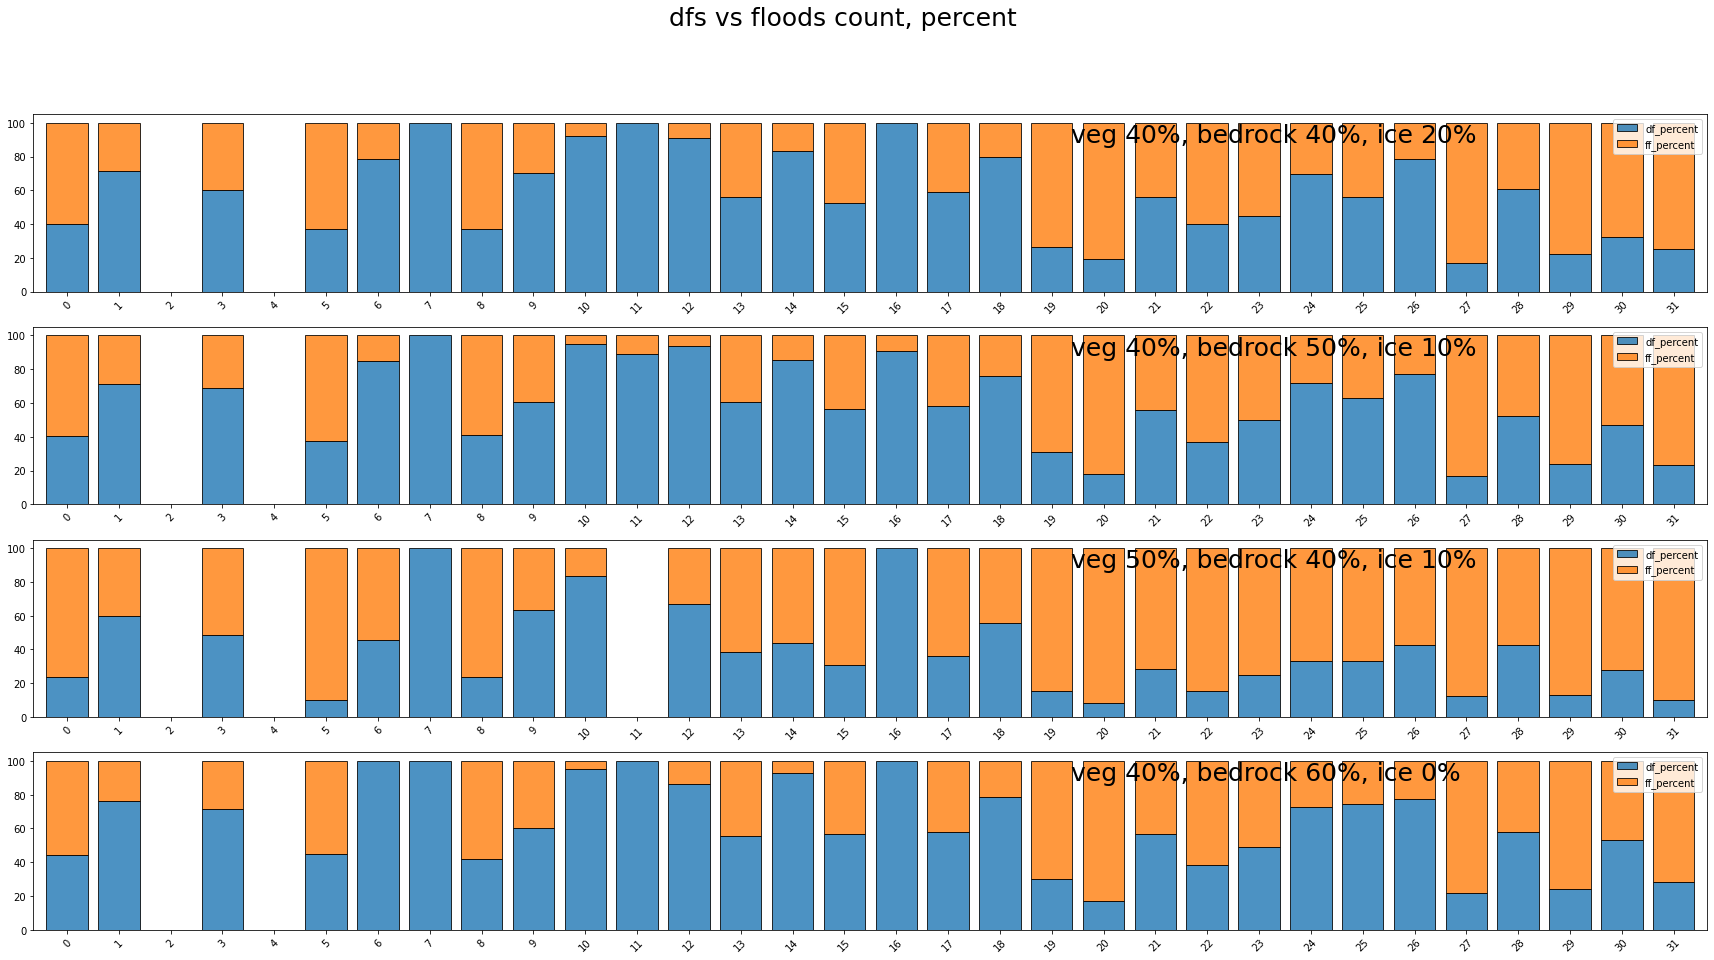

In [123]:
fig = plt.figure(figsize=(30, 15))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')

daily20_lc1_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=True, edgecolor = 'black', ax=mosaic['a'])
daily20_lc2_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=True, edgecolor = 'black', ax=mosaic['b'])
daily20_lc3_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=True, edgecolor = 'black', ax=mosaic['c'])
daily20_lc4_forplot.plot.bar(alpha = 0.8, rot=45, width=0.8, stacked=True, edgecolor = 'black', ax=mosaic['d'])


# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%',  transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

plt.suptitle('dfs vs floods count, percent', fontsize = 25)

In [124]:
# calculate mean per year per elevation bin, plot 

In [125]:
# daily30_lc2

In [126]:
daily20_lc1_forplot2 = daily20_lc1_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily20_lc2_forplot2 = daily20_lc2_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily20_lc3_forplot2 = daily20_lc3_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily20_lc4_forplot2 = daily20_lc4_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')

daily30_lc1_forplot2 = daily30_lc1_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily30_lc2_forplot2 = daily30_lc2_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily30_lc3_forplot2 = daily30_lc3_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily30_lc4_forplot2 = daily30_lc4_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')

daily40_lc1_forplot2 = daily40_lc1_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily40_lc2_forplot2 = daily40_lc2_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily40_lc3_forplot2 = daily40_lc3_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
daily40_lc4_forplot2 = daily40_lc4_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')




In [127]:
daily20_lc1_forplot2 = calculate_percent(daily20_lc1_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily20_lc2_forplot2 = calculate_percent(daily20_lc2_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily20_lc3_forplot2 = calculate_percent(daily20_lc3_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily20_lc4_forplot2 = calculate_percent(daily20_lc4_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]

daily30_lc1_forplot2 = calculate_percent(daily30_lc1_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily30_lc2_forplot2 = calculate_percent(daily30_lc2_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily30_lc3_forplot2 = calculate_percent(daily30_lc3_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily30_lc4_forplot2 = calculate_percent(daily30_lc4_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]

daily40_lc1_forplot2 = calculate_percent(daily40_lc1_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily40_lc2_forplot2 = calculate_percent(daily40_lc2_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily40_lc3_forplot2 = calculate_percent(daily40_lc3_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
daily40_lc4_forplot2 = calculate_percent(daily40_lc4_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]


# sort elevation 

daily40_lc1_forplot2 = daily40_lc1_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')
daily40_lc2_forplot2 = daily40_lc2_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')
daily40_lc3_forplot2 = daily40_lc3_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')
daily40_lc4_forplot2 = daily40_lc4_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')


In [128]:
daily20_lc1_forplot2

,df_percent,ff_percent,elevation_bin
0,34.939759,65.060241,2400 - 2599
1,34.939759,65.060241,2600 - 2799
2,37.974684,62.025316,3200 - 3399
3,0.000000,100.000000,3400 - 3599
4,41.764706,58.235294,3600 - 3799
5,42.788462,57.211538,3800 - 3999
6,0.000000,100.000000,4000 - 4199
7,17.441860,82.558140,4200 - 4399
8,35.315985,64.684015,4400 - 4599
9,16.564417,83.435583,4600 - 4799


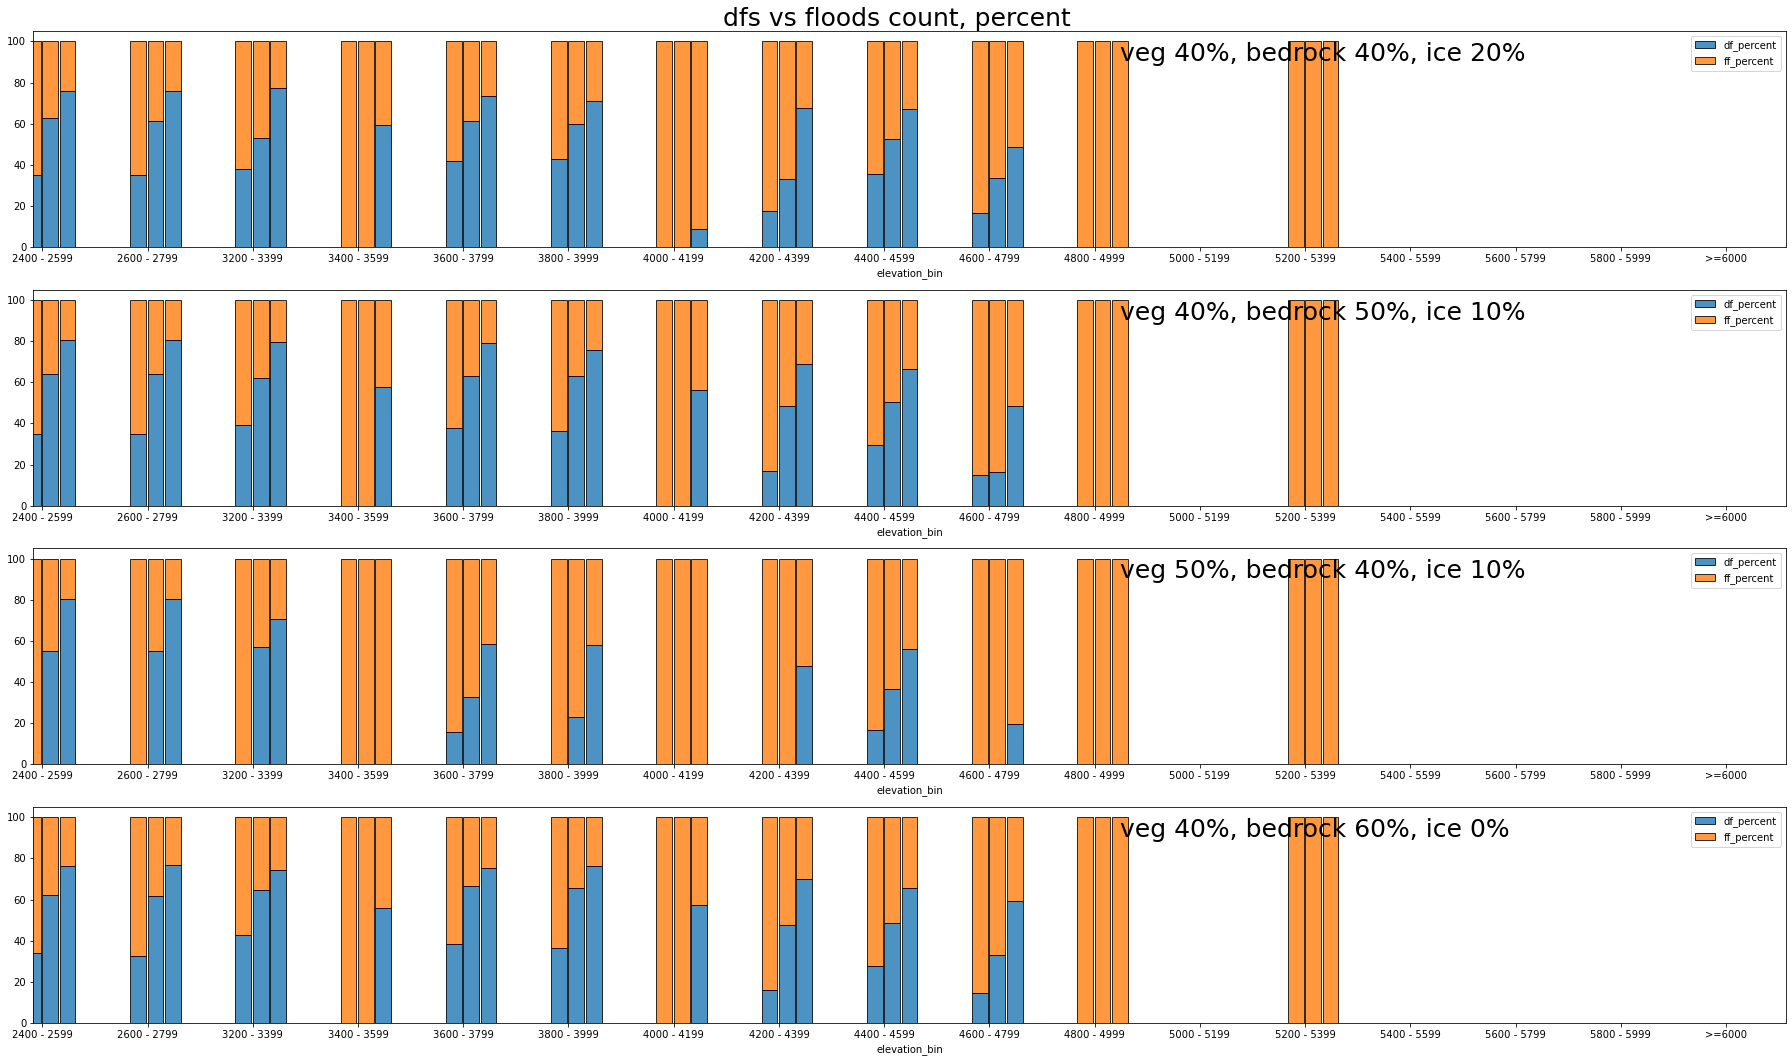

In [129]:
import matplotlib.pyplot as plt

# Create figure and mosaic layout
fig = plt.figure(figsize=(25, 15))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')

# Define the width of bars and the offset for each bar group
width = 0.15

# Plotting daily20... and daily30... side by side in each subplot
# Shift daily20... bars to the left by `width/2`, and daily30... bars to the right by `width/2`
daily20_lc1_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['a'])
daily30_lc1_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['a'], legend = False)
daily40_lc1_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['a'], legend = False)#, cmap = 'viridis')

daily20_lc2_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['b'])
daily30_lc2_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['b'], legend = False)
daily40_lc2_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['b'], legend = False)

daily20_lc3_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['c'])
daily30_lc3_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['c'], legend = False)
daily40_lc3_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['c'], legend = False)

daily20_lc4_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['d'])
daily30_lc4_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['d'], legend = False)
daily40_lc4_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['d'], legend = False)

# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%', transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Title for the whole figure
plt.suptitle('dfs vs floods count, percent', fontsize=25)

plt.tight_layout()


# 

In [130]:
test = daily20_lc1_forplot2.set_index('elevation_bin').T

<AxesSubplot:xlabel='elevation_bin'>

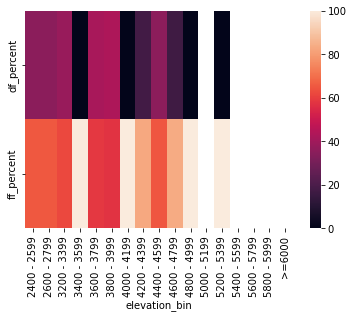

In [131]:
sns.heatmap(test)

# once per year input


In [132]:
once20_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once20_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once20_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover3.csv', index_col = 0).fillna(0)[:-1]#[:372]
once20_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_20percent/{location}_{freq}_df_count_20percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

once30_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once30_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once30_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
once30_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_30percent/{location}_{freq}_df_count_30percent_landcover4.csv', index_col = 0).fillna(0)#[:372]

once40_lc1 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover1.csv', index_col = 0).fillna(0)#[:372]
once40_lc2 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover2.csv', index_col = 0).fillna(0)#[:372]
once40_lc3 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover3.csv', index_col = 0).fillna(0)#[:372]
once40_lc4 = pd.read_csv(f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/SL_once/output_40percent/{location}_{freq}_df_count_40percent_landcover4.csv', index_col = 0).fillna(0)#[:372]


# prepare for plots ets 
# 20 percent
once20_lc1_melt = prepare_dfcount_for_plot_annual(once20_lc1)
once20_lc2_melt = prepare_dfcount_for_plot_annual(once20_lc2)
once20_lc3_melt = prepare_dfcount_for_plot_annual(once20_lc3)
once20_lc4_melt = prepare_dfcount_for_plot_annual(once20_lc4)

once20_lc1_melt['dfspot_count'] = dfspot1_melted.dfspot_count.values
once20_lc2_melt['dfspot_count'] = dfspot2_melted.dfspot_count.values
once20_lc3_melt['dfspot_count'] = dfspot3_melted.dfspot_count.values
once20_lc4_melt['dfspot_count'] = dfspot4_melted.dfspot_count.values

once20_lc1_melt['floods'] = once20_lc1_melt.dfspot_count - once20_lc1_melt.dfs_count
once20_lc2_melt['floods'] = once20_lc2_melt.dfspot_count - once20_lc2_melt.dfs_count
once20_lc3_melt['floods'] = once20_lc3_melt.dfspot_count - once20_lc3_melt.dfs_count
once20_lc4_melt['floods'] = once20_lc4_melt.dfspot_count - once20_lc4_melt.dfs_count


# 30 percent
once30_lc1_melt = prepare_dfcount_for_plot_annual(once30_lc1)
once30_lc2_melt = prepare_dfcount_for_plot_annual(once30_lc2)
once30_lc3_melt = prepare_dfcount_for_plot_annual(once30_lc3)
once30_lc4_melt = prepare_dfcount_for_plot_annual(once30_lc4)

once30_lc1_melt['dfspot_count'] = dfspot1_melted.dfspot_count.values
once30_lc2_melt['dfspot_count'] = dfspot2_melted.dfspot_count.values
once30_lc3_melt['dfspot_count'] = dfspot3_melted.dfspot_count.values
once30_lc4_melt['dfspot_count'] = dfspot4_melted.dfspot_count.values

once30_lc1_melt['floods'] = once30_lc1_melt.dfspot_count - once30_lc1_melt.dfs_count
once30_lc2_melt['floods'] = once30_lc2_melt.dfspot_count - once30_lc2_melt.dfs_count
once30_lc3_melt['floods'] = once30_lc3_melt.dfspot_count - once30_lc3_melt.dfs_count
once30_lc4_melt['floods'] = once30_lc4_melt.dfspot_count - once30_lc4_melt.dfs_count


# 40 percent
once40_lc1_melt = prepare_dfcount_for_plot_annual(once40_lc1)
once40_lc2_melt = prepare_dfcount_for_plot_annual(once40_lc2)
once40_lc3_melt = prepare_dfcount_for_plot_annual(once40_lc3)
once40_lc4_melt = prepare_dfcount_for_plot_annual(once40_lc4)

once40_lc1_melt['dfspot_count'] = dfspot1_melted.dfspot_count.values
once40_lc2_melt['dfspot_count'] = dfspot2_melted.dfspot_count.values
once40_lc3_melt['dfspot_count'] = dfspot3_melted.dfspot_count.values
once40_lc4_melt['dfspot_count'] = dfspot4_melted.dfspot_count.values


once40_lc1_melt['floods'] = once40_lc1_melt.dfspot_count - once40_lc1_melt.dfs_count
once40_lc2_melt['floods'] = once40_lc2_melt.dfspot_count - once40_lc2_melt.dfs_count
once40_lc3_melt['floods'] = once40_lc3_melt.dfspot_count - once40_lc3_melt.dfs_count
once40_lc4_melt['floods'] = once40_lc4_melt.dfspot_count - once40_lc4_melt.dfs_count


In [133]:
once20_lc1_forplot2 = once20_lc1_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once20_lc2_forplot2 = once20_lc2_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once20_lc3_forplot2 = once20_lc3_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once20_lc4_forplot2 = once20_lc4_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')

once30_lc1_forplot2 = once30_lc1_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once30_lc2_forplot2 = once30_lc2_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once30_lc3_forplot2 = once30_lc3_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once30_lc4_forplot2 = once30_lc4_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')

once40_lc1_forplot2 = once40_lc1_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once40_lc2_forplot2 = once40_lc2_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once40_lc3_forplot2 = once40_lc3_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')
once40_lc4_forplot2 = once40_lc4_melt.groupby('elevation_bin').mean().reset_index()[['dfspot_count', 'dfs_count', 'floods', 'elevation_bin']].sort_values('elevation_bin')#.set_index('elevation_bin')


once20_lc1_forplot2 = calculate_percent(once20_lc1_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once20_lc2_forplot2 = calculate_percent(once20_lc2_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once20_lc3_forplot2 = calculate_percent(once20_lc3_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once20_lc4_forplot2 = calculate_percent(once20_lc4_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]

once30_lc1_forplot2 = calculate_percent(once30_lc1_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once30_lc2_forplot2 = calculate_percent(once30_lc2_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once30_lc3_forplot2 = calculate_percent(once30_lc3_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once30_lc4_forplot2 = calculate_percent(once30_lc4_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]

once40_lc1_forplot2 = calculate_percent(once40_lc1_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once40_lc2_forplot2 = calculate_percent(once40_lc2_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once40_lc3_forplot2 = calculate_percent(once40_lc3_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]
once40_lc4_forplot2 = calculate_percent(once40_lc4_forplot2)[['df_percent', 'ff_percent', 'elevation_bin']]


# sort elevation 

once40_lc1_forplot2 = once40_lc1_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')
once40_lc2_forplot2 = once40_lc2_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')
once40_lc3_forplot2 = once40_lc3_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')
once40_lc4_forplot2 = once40_lc4_forplot2.sort_values(by='elevation_bin', key=lambda col: col.map(custom_sort_elevation)).set_index('elevation_bin')


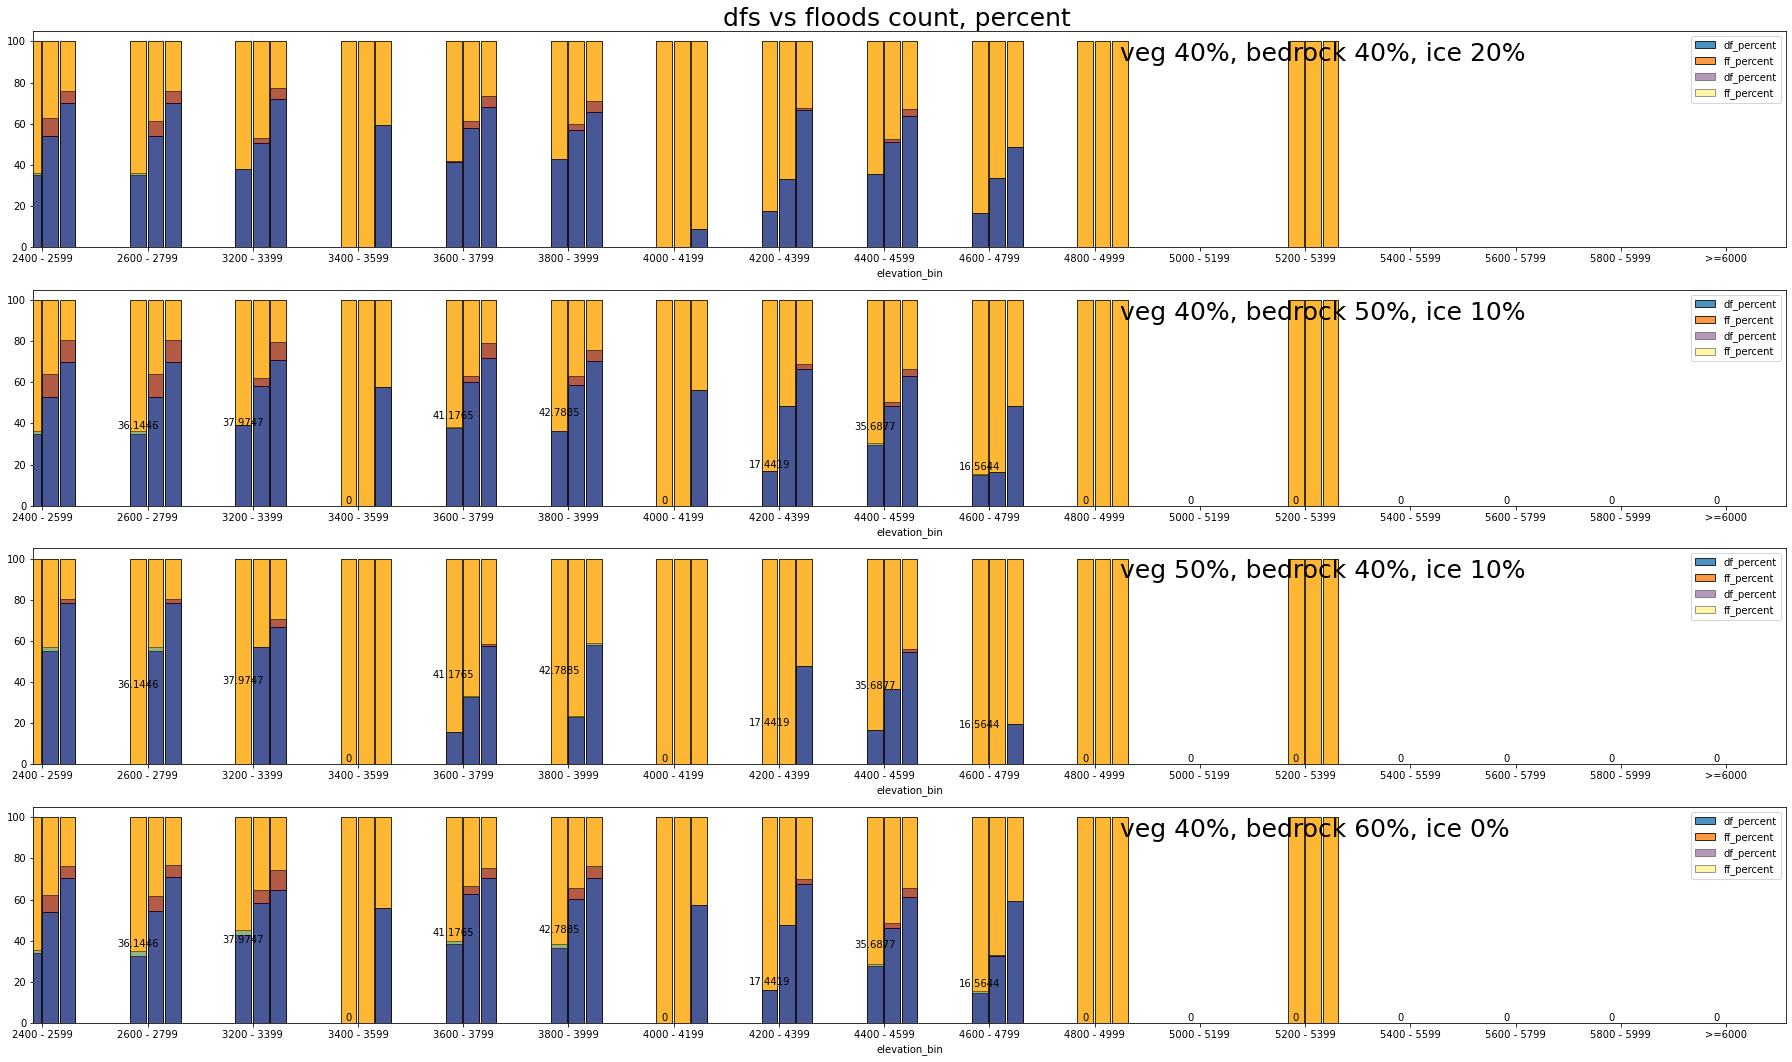

In [134]:
import matplotlib.pyplot as plt

# Create figure and mosaic layout
fig = plt.figure(figsize=(25, 15))
mosaic = fig.subplot_mosaic('''
                            aaa
                            bbb
                            ccc
                            ddd
                            ''')

# Define the width of bars and the offset for each bar group
width = 0.15

# Plotting daily20... and daily30... side by side in each subplot

# -------------- landcover 1
once20_lc1_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['a'])
once30_lc1_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['a'], legend = False)
once40_lc1_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['a'], legend = False)#, cmap = 'viridis')


# daily
daily20_lc1_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['a'], cmap = 'viridis')
daily30_lc1_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['a'], legend = False, cmap = 'viridis')
daily40_lc1_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['a'], legend = False, cmap = 'viridis')

# -------------- landcover 2
once20_lc2_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['b'])
once30_lc2_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['b'], legend = False)
once40_lc2_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['b'], legend = False)
mosaic['b'].bar_label(mosaic['a'].containers[0], fontsize=10);

# daily
daily20_lc2_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['b'], cmap = 'viridis')
daily30_lc2_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['b'], legend = False, cmap = 'viridis')
daily40_lc2_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['b'], legend = False, cmap = 'viridis')

# -------------- landcover 3
once20_lc3_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['c'])
once30_lc3_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['c'], legend = False)
once40_lc3_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['c'], legend = False)
mosaic['c'].bar_label(mosaic['a'].containers[0], fontsize=10);

# daily
daily20_lc3_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['c'], cmap = 'viridis')
daily30_lc3_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['c'], legend = False, cmap = 'viridis')
daily40_lc3_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['c'], legend = False, cmap = 'viridis')



# -------------- landcover 4
once20_lc4_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['d'])
once30_lc4_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['d'], legend = False)
once40_lc4_forplot2.plot.bar(alpha=0.8, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['d'], legend = False)
mosaic['d'].bar_label(mosaic['a'].containers[0], fontsize=10);

daily20_lc4_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=1.1,  ax=mosaic['d'], cmap = 'viridis')
daily30_lc4_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=0,    ax=mosaic['d'], legend = False, cmap = 'viridis')
daily40_lc4_forplot2.plot.bar(alpha=0.4, rot=0, width=width, stacked=True, edgecolor='black', position=-1.1, ax=mosaic['d'], legend = False, cmap = 'viridis')



# Adding text to the top-left corner of each subplot
mosaic['a'].text(0.62, 0.95, 'veg 40%, bedrock 40%, ice 20%', transform=mosaic['a'].transAxes, fontsize=25, verticalalignment='top')
mosaic['b'].text(0.62, 0.95, 'veg 40%, bedrock 50%, ice 10%', transform=mosaic['b'].transAxes, fontsize=25, verticalalignment='top')
mosaic['c'].text(0.62, 0.95, 'veg 50%, bedrock 40%, ice 10%', transform=mosaic['c'].transAxes, fontsize=25, verticalalignment='top')
mosaic['d'].text(0.62, 0.95, 'veg 40%, bedrock 60%, ice 0%', transform=mosaic['d'].transAxes, fontsize=25, verticalalignment='top')

# Title for the whole figure
plt.suptitle('dfs vs floods count, percent', fontsize=25)

plt.tight_layout()
